In [13]:
%pip install numpy pandas matplotlib regions

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#data = pd.read_csv('./results/ngc3741/data_csv.csv')
data = np.loadtxt('./interiorh2reg.txt')
data2 = np.loadtxt('./diffuse_sums.txt')
datatotal = np.append(data,data2)
print(datatotal)
instmag = -2.5*np.log10(datatotal/720)

[ 23846.63811067 267796.82848121  17513.2810548    6948.69934584
  26571.77736174   7353.04323709  18550.80245403   7016.11208357
   6861.71729885   6723.26707533  10174.0217486    7896.47865073
   6104.18583435   5053.34895036  16680.26174203   7838.16302211
   4675.30924415   8019.72367162   3516.02898014   3446.5304211
   2924.39378101]


[1.70732760e-14 1.91732233e-13 1.25388359e-14 4.97500157e-15
 1.90243710e-14 5.26449625e-15 1.32816613e-14 5.02326650e-15
 4.91272577e-15 4.81360073e-15 7.28420840e-15 5.65357511e-15
 4.37036236e-15 3.61800356e-15 1.19424261e-14 5.61182336e-15
 3.34734166e-15 5.74181381e-15 2.51734157e-15 2.46758327e-15
 2.09375351e-15]
36.41193732467372 38.37370690236265


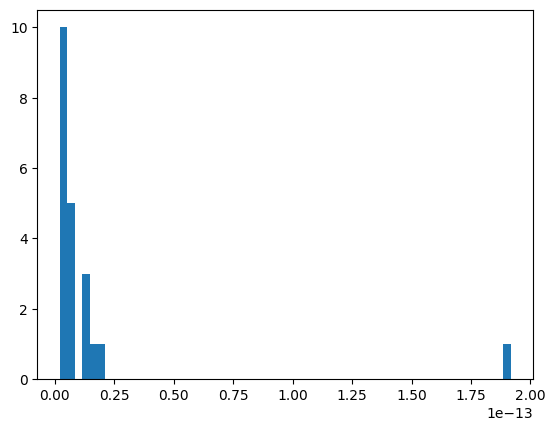

In [16]:
#zp correction; first correct for filter function (assumes a gaussian filter)
filt_fwhm = 80
a0 = 21.565
filter_func=0.5*np.sqrt(np.pi/np.log(2.)) * filt_fwhm
zp=a0 - 2.5*np.log10(filter_func)
aemag = instmag+ zp

#  convert from magnitudes to fluxes
fluxlog =-(aemag +21.48)/2.5
flux=10**(fluxlog)
print(flux)
plt.hist(flux,bins=60)
histflux = np.histogram(flux,bins=20)

##Convert to luminosity 
## F = L/4piD^2
L = flux*(4*np.pi)*(3.21E6*3.086E18)**2
logL = np.log10(L)
print(min(logL),max(logL))

In [17]:
bins = np.arange(36,38.6,0.2)
lum_his = np.histogram(logL,bins=bins)
print(lum_his)
print(len(lum_his[0]),len(lum_his[1]))
bincenters = []
for i in range(len(bins)):
    if i>0:
        bincenters.append((bins[i]+bins[i-1])/2)
print(len(bincenters))
print(bincenters)

(array([0, 0, 3, 7, 5, 2, 3, 0, 0, 0, 0, 1, 0]), array([36. , 36.2, 36.4, 36.6, 36.8, 37. , 37.2, 37.4, 37.6, 37.8, 38. ,
       38.2, 38.4, 38.6]))
13 14
13
[36.1, 36.300000000000004, 36.50000000000001, 36.70000000000001, 36.90000000000001, 37.100000000000016, 37.30000000000002, 37.50000000000002, 37.700000000000024, 37.90000000000003, 38.10000000000003, 38.30000000000003, 38.500000000000036]


In [18]:
lum_weight = []
for i in range(len(bins)):
    if i>0:
        lum_weight.append(10**(bins[i]-40)-10**(bins[i-1]-40))
lum_weight=np.array(lum_weight)
lum_func = lum_his[0]/lum_weight
print(lum_func)
log_lumfunc = np.log10(lum_func)
print(log_lumfunc)

[    0.             0.         20419.48046335 30062.24939391
 13548.56931906  3419.42772762  3236.269558       0.
     0.             0.             0.           107.87565193
     0.        ]
[      -inf       -inf 4.31004469 4.47802147 4.13189344 3.53395343
 3.51004469       -inf       -inf       -inf       -inf 2.03292343
       -inf]


/var/folders/p8/2qpn3ldx4s58gvbc0c41f6g80000gn/T/ipykernel_9344/1622514615.py:8: RuntimeWarning: divide by zero encountered in log10
  log_lumfunc = np.log10(lum_func)


Text(0, 0.5, 'log(N/dL)')

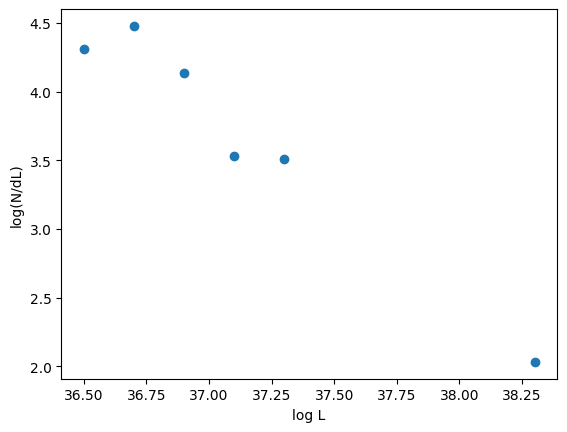

In [19]:
plt.scatter(bincenters,log_lumfunc)
#plt.ylim(0,6.5)
plt.xlabel('log L')
plt.ylabel('log(N/dL)')

In [21]:
print(bincenters)
print(log_lumfunc)

bincen1 = bincenters[2:7]
bincen2 = bincenters[11]
llf1 = log_lumfunc[2:7]
llf2 = log_lumfunc[11]
print(llf2)

bincenfit = np.append(bincen1,bincen2)
llfit = np.append(llf1,llf2)
print(llfit)

fit = np.polyfit(bincenfit,llfit,1,cov=True)
print(fit)

[36.1, 36.300000000000004, 36.50000000000001, 36.70000000000001, 36.90000000000001, 37.100000000000016, 37.30000000000002, 37.50000000000002, 37.700000000000024, 37.90000000000003, 38.10000000000003, 38.30000000000003, 38.500000000000036]
[      -inf       -inf 4.31004469 4.47802147 4.13189344 3.53395343
 3.51004469       -inf       -inf       -inf       -inf 2.03292343
       -inf]
2.0329234333362094
[4.31004469 4.47802147 4.13189344 3.53395343 3.51004469 2.03292343]
(array([-1.37475069, 54.71522249]), array([[ 1.93093678e-02, -7.17021191e-01],
       [-7.17021191e-01,  2.66319306e+01]]))


In [ ]:
intL = []
for i in range(len(bincenters):
    

9 9


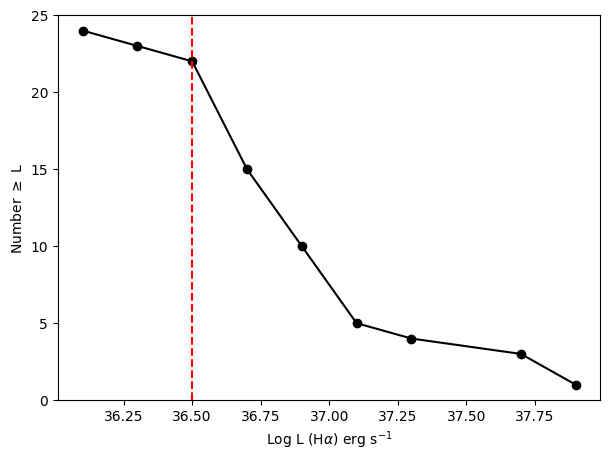

In [11]:
intL = [24,23,22,15,10,5,4,3,1]
bincen3 =  bincenters[0:7]
bincen4 = bincenters[8:10]
bincenint = np.append(bincen3,bincen4)
print(len(bincenint),len(intL))

fig=plt.figure(figsize=(7,5))
plt.scatter(bincenint,intL,color='k')
plt.plot(bincenint,intL,color='k')
plt.xlabel(r'Log L (H$\alpha$) erg s$^{-1}$')
plt.ylim(0,25)
plt.ylabel(r'Number $\geq$ L')
plt.vlines(bincenint[2],0,25,linestyle='--',color='r')
fig.savefig('NGC3741 Luminosity Function',dpi=300)